<h1 style='text-align: center;'> NLP Hotel Reviews 2 | Rafael Almazan </h1>
<h3 style='text-align: center;'> Machine Learning Models </h3>

### Introduction:
For this portion, we are going to fit some classification models onto our cleaned data, predicting whether a review is a good review or a bad review. To start, we will take a look at our cleaned data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

In [103]:
# reading in our data
reviews = pd.read_csv('clean_data/clean_train_dataframe.csv')
reviews.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# checking info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 267.9 MB


In [105]:
# checking shape
reviews.shape

(12798, 2744)

In [106]:
# checking for null values
reviews.isna().sum().sort_values()

Additional_Number_of_Scoring    0
n_electrical                    0
n_elevator                      0
n_else                          0
n_elsewhere                     0
                               ..
p_layout                        0
p_le                            0
p_leave                         0
p_lady                          0
rating                          0
Length: 2744, dtype: int64

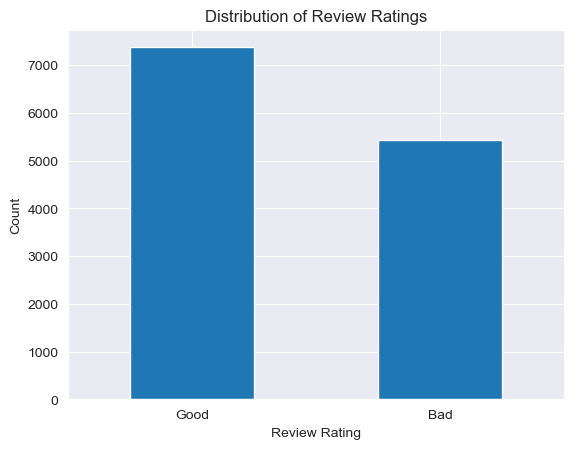

In [107]:
# checking distribution for target class
dist = reviews['rating'].map({1:'Good', 0:'Bad'}).value_counts().plot(kind='bar')
dist.set_xticklabels(dist.get_xticklabels(), rotation=0)
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Distribution of Review Ratings')
plt.show()


Our review dataset has 12798 rows and 2744 columns (12798, 2744). We also see that this dataset is clean and we have no null values. 

However, we see in the bar graph above that our target class (Review Ratings) is imbalanced. Due to this, we are unable to solely rely on accuracy as a metric for evaluating our models since it could be misleading and does not provide an accurate representation of the model performance.

We will deploy different approaches and evaluation metrics such as the confusion matrix and classfication report to gain a more comprehensive understanding of our model's performance across the target classes.

The confusion matrix gives us insight on how many true positives and negatives our model is able to detect as well as the false positives and negatives. While the classification report gives us information on the precision, accuracy, and f1-score of our model, which we will go into more, once we start evaluating our models.

## 1. Logistic Regression

Now that we have taken a high-level look at our model, we can start our modeling process. We will first seperate our train data into a train and validation set while we tune our hyperparameters and apply regularization techniques to account for overfitting.

We will use 80% of our train set to train our model and 20% of the set to validate and use for evaluation. Since our target variable is imbalanced, we will stratify by our target variable.

After we have our final model, tuning with the validation set, we will fit the logistic regression to both the train and validation set and evaluate our model on the test set provided

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting our independent and dependent variables
X = reviews.drop('rating', axis=1)
y = reviews['rating']

# train-validation split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)


After splitting our data and acquiring our validation set, we can now fit our base logistic regression model. we will have the solver set to lbfgs (default)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

# print evaluation metrics
print(f'Train Score: {logreg.score(X_train, y_train).round(2)}')
print(f'Validation Score: {logreg.score(X_validate, y_validate).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_validate, logreg.predict(X_validate))}')
print(classification_report(y_validate, logreg.predict(X_validate)))

Train Score: 0.91
Validation Score: 0.73
Confusion Matrix: 
 [[ 730  355]
 [ 329 1146]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1085
           1       0.76      0.78      0.77      1475

    accuracy                           0.73      2560
   macro avg       0.73      0.72      0.73      2560
weighted avg       0.73      0.73      0.73      2560



Our base model seems to be working decently well with the validation set without any adjustments. We also see that the model is heavily overfitted to the training set, with 91% accuracy on the train set while only having 73% accuracy on the validation set.

the model also seems to be doing better at detecting good reviews as opposed to bad reviews. Good reviews have an f1-score of 0.77 while bad reviews have an f1-score of 0.68. The f1-score is a combination of precision and recall. Precision is how many of the positive predictions made ny the model were correct while recall is how many of the positive cases the model detects over the total number of positives in the whole dataset. 

Our logistic regression model above seems to pick up on 78% of the total good reviews and 67% of the total bad reviews. The model seems to be right on its predictions 69% of the time in regards to bad reviews, and 76% of the time with good reviews.

Since there is overfitting in our model, we will apply l2 regularization and evaluate the model again using the validation set.

In [110]:
# looping through different regularization C-values for l2 regularization

# creating scores table
scores = pd.DataFrame()
c_range = [10 ** exp for exp in range(-5, 5 + 1, 1)]

for n,i in enumerate(c_range):
    logreg = LogisticRegression(C=i, penalty='l2', solver='lbfgs')
    logreg.fit(X_train, y_train)

    # appending values and metrics to our scores table
    scores.loc[n,'C-value'] = i
    scores.loc[n,'Training Accuracy'] = logreg.score(X_train, y_train)
    scores.loc[n,'Validation Accuracy'] = logreg.score(X_validate, y_validate)
scores

,C-value,Training Accuracy,Validation Accuracy
0,0.00001,0.650713,0.641406
1,0.00010,0.800059,0.780469
2,0.00100,0.861203,0.791406
3,0.01000,0.893339,0.767578
4,0.10000,0.906329,0.741406
5,1.00000,0.910432,0.732812
6,10.00000,0.910627,0.734766
7,100.00000,0.910432,0.733984
8,1000.00000,0.910627,0.733984
9,10000.00000,0.910725,0.733984


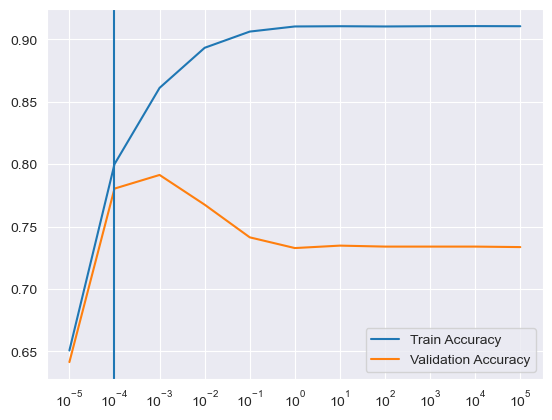

In [111]:
# creating visual to compare train and validation accuracies across different regularization strengths
plt.figure()
plt.plot(scores['C-value'], scores['Training Accuracy'], label='Train Accuracy')
plt.plot(scores['C-value'], scores['Validation Accuracy'], label='Validation Accuracy')
plt.legend()
plt.xscale('log')
plt.axvline(x=10e-5)
plt.xticks(c_range)
plt.show()

Looking at the graph above, we see that we are able to decrease overfitting by applying l2 regularization or a ridge penalty. Decreasing the C-value decreases our coefficients and overall increases the regularization strength by weighing the l2 penalty much more than the train set features that the logistic regression is fitting on. At a C-value of $10^{-4}$, we see that we are able to get a stronger accuracy while minimizing the overfitting that is happening. Therefore, we will proceed with a C-value of $10^{-4}$

In [246]:
# fitting logistic regression with C=1e-4
logreg = LogisticRegression(solver='lbfgs', C=1e-4, penalty='l2')

logreg.fit(X_train, y_train)

# print evaluation metrics
print(f'Train Score: {logreg.score(X_train, y_train).round(2)}')
print(f'Validation Score: {logreg.score(X_validate, y_validate).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_validate, logreg.predict(X_validate))}')
print(classification_report(y_validate, logreg.predict(X_validate)))

Train Score: 0.8
Validation Score: 0.78
Confusion Matrix: 
 [[ 652  433]
 [ 129 1346]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1085
           1       0.76      0.91      0.83      1475

    accuracy                           0.78      2560
   macro avg       0.80      0.76      0.76      2560
weighted avg       0.79      0.78      0.77      2560



Now that we have tuned our hyperparameters, we can fit our model to all our train data and evaluate it on the given separate test set.

In [113]:
# reading in test set
reviews_test = pd.read_csv('clean_data/clean_test_dataframe.csv')

X_test = reviews_test.drop('rating', axis=1)
y_test = reviews_test['rating']

In [248]:
#scaling based on training dataset
scaler = StandardScaler()
scaler.fit(X) # from reading the train csv
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

# fitting logistic regression model
logreg = LogisticRegression(solver='lbfgs', C=1e-4, penalty='l2')
logreg.fit(X_scaled, y)

# print evaluation metrics
print(f'Train Score: {logreg.score(X_scaled, y).round(2)}')
print(f'Test Score: {logreg.score(X_test_scaled, y_test).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, logreg.predict(X_test_scaled))}')
print(classification_report(y_test, logreg.predict(X_test_scaled)))

Train Score: 0.81
Test Score: 0.78
Confusion Matrix: 
 [[1157  652]
 [ 282 2176]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1809
           1       0.77      0.89      0.82      2458

    accuracy                           0.78      4267
   macro avg       0.79      0.76      0.77      4267
weighted avg       0.78      0.78      0.78      4267



Evaluating our model on our test dataset, we can see that the accuracy is 78% on brand new data. This follows the same pattern as our validation set above. The test score is slightly lower than the train score. However, the overfitting is minimized by the Ridge regularization used on the model, with a C-value of $10^{-4}$ 

Using this model and its regression coefficients, we will now look at the 20 words that are most predictive of a good review

In [249]:
logreg_odds = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
logreg_odds['Odds ratio'] = np.exp(logreg_odds['Coefficient'])
pos_logreg_odds20 = logreg_odds[logreg_odds['Feature'].str.contains('^p_')].sort_values('Coefficient', ascending=False).head(20)
neg_logreg_odds20 = logreg_odds[logreg_odds['Feature'].str.contains('^n_')].sort_values('Coefficient', ascending=True).head(20)
neg_logreg_odds20

,Feature,Coefficient,Odds ratio
2416,n_room,-0.057242,0.944366
1400,n_,-0.056905,0.944684
2495,n_small,-0.043887,0.957062
2533,n_staff,-0.039789,0.960992
2297,n_poor,-0.034645,0.965948
1559,n_bed,-0.031395,0.969092
2202,n_noisy,-0.028856,0.971556
2619,n_tire,-0.027911,0.972475
1554,n_bathroom,-0.027508,0.972867
2732,n_work,-0.025424,0.974896


Text(0.5, 1.0, 'Top 20 Words Most Predictive of a Good Review')

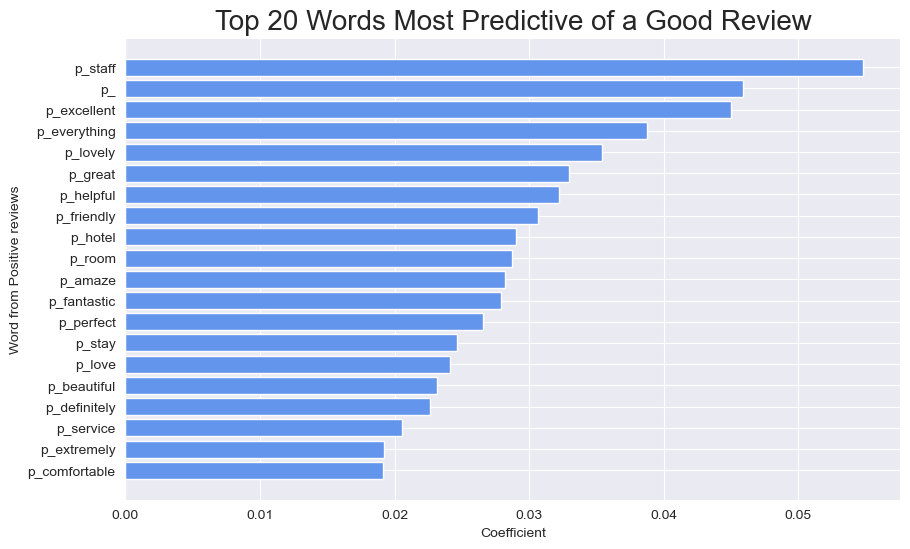

In [253]:
plt.figure(figsize=(10,6))
plt.barh(pos_logreg_odds20['Feature'], pos_logreg_odds20['Coefficient'], color='cornflowerblue')
plt.xlabel('Coefficient')
plt.ylabel('Word from Positive reviews')
plt.title('Top 20 Words Most Predictive of a Good Review', fontsize=20)

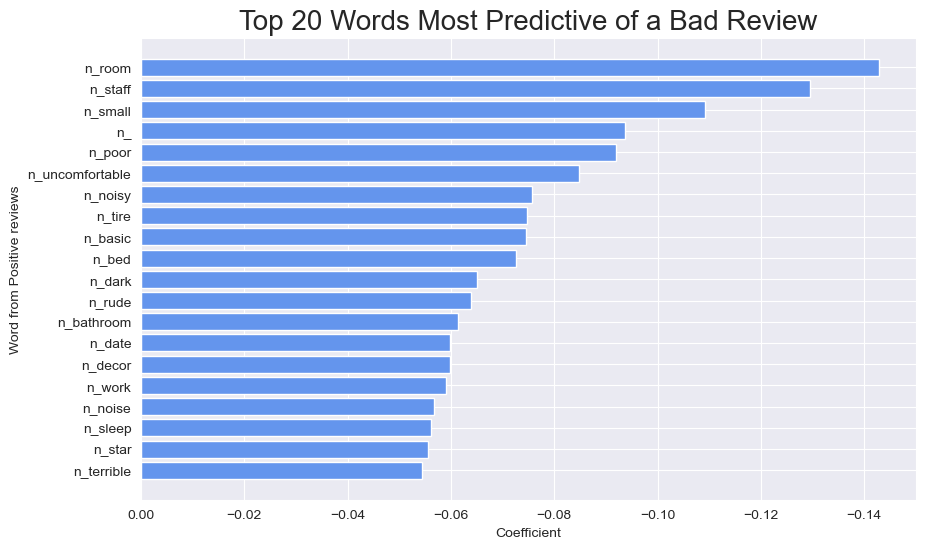

In [117]:
plt.figure(figsize=(10,6))
plt.barh(neg_logreg_odds20['Feature'][::-1], neg_logreg_odds20['Coefficient'][::-1], color='cornflowerblue')
plt.xlabel('Coefficient')
plt.ylabel('Word from Positive reviews')
plt.title('Top 20 Words Most Predictive of a Bad Review', fontsize=20)
plt.gca().invert_xaxis()

Above, we plotted the coefficients to see which words from the positive reviews were more associated with a good review score and which words from the negative reviews were more associated with a bad review score. We can then use these coefficients to take the log-odds of each feature to see exactly how much each feature is affecting our predictions

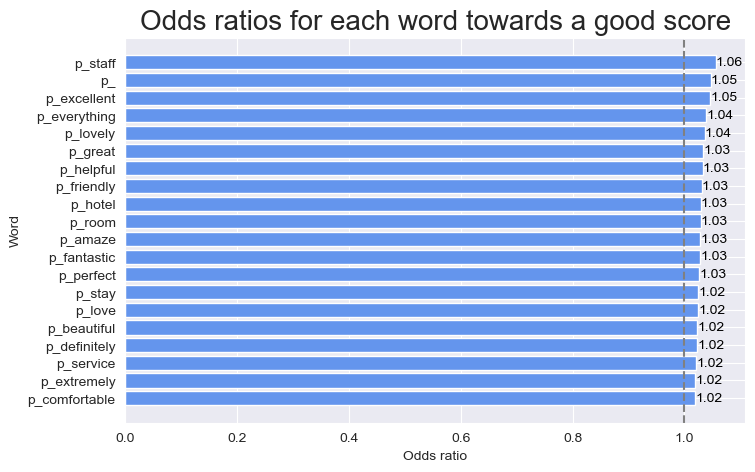

In [251]:
# plotting the odds ratios for each feature
plt.figure(figsize=(8,5))
pos_logreg_odds20.sort_values(by='Odds ratio', inplace=True)
plt.barh(pos_logreg_odds20['Feature'], pos_logreg_odds20['Odds ratio'], color='cornflowerblue')
plt.title('Odds ratios for each word towards a good score', fontsize=20)
plt.xlabel('Odds ratio')
plt.ylabel('Word')
plt.axvline(x=1, linestyle='--', color='gray')

# printing Odds Ratio values beside bar
for i, v in enumerate(pos_logreg_odds20['Odds ratio']):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.show()

Looking at the odds ratios of the top words coming from positive reviews, we see that these all sway the model's predictions to the (1) value, or the positive reviews. For example, one unit increse in the word "excellent" in a positive review will increase the chances of seeing a good review score by a factor of 1.17. Likewise, an increase in the word "staff" in the positive reviews will increase the chances of seeing a good review score by a factor of 1.15. This suggests that when reviewers have a positive outlook on the staff, it really affects the likelihood of a positive review. This information puts emphasis on the staff to do a great job.

We will now look at the same for the negative reviews, how they affect our likelihood of getting a bad review score (rating = 0)

In [119]:
# creating new column for odds of seeing bad rating (rating=0)
neg_logreg_odds20['Odds ratio (bad)'] = neg_logreg_odds20['Odds ratio'].apply(lambda x: 1/x)

# sanity check
neg_logreg_odds20.sort_values('Odds ratio (bad)', ascending=False).head()

,Feature,Coefficient,Odds ratio,Odds ratio (bad)
2416,n_room,-0.142882,0.866856,1.153594
2533,n_staff,-0.129510,0.878526,1.138270
2495,n_small,-0.109105,0.896637,1.115279
1400,n_,-0.093668,0.910585,1.098195
2297,n_poor,-0.092039,0.912069,1.096408


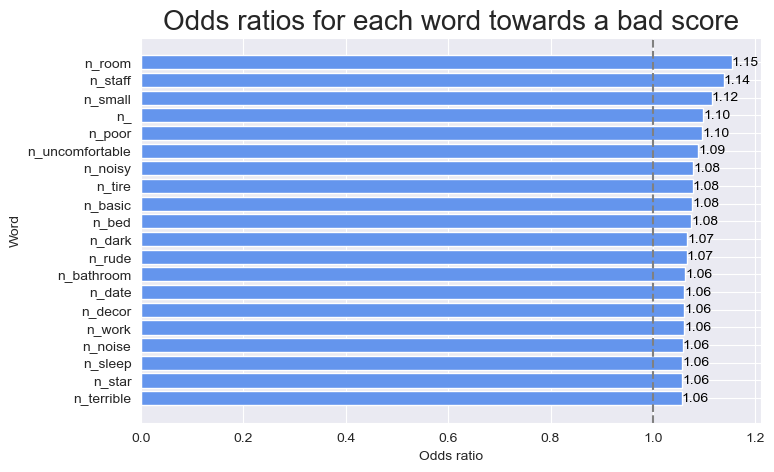

In [120]:
# plotting the odds ratios for each feature
plt.figure(figsize=(8,5))
neg_logreg_odds20.sort_values(by='Odds ratio (bad)', inplace=True)
plt.barh(neg_logreg_odds20['Feature'], neg_logreg_odds20['Odds ratio (bad)'], color='cornflowerblue')
plt.title('Odds ratios for each word towards a bad score', fontsize=20)
plt.xlabel('Odds ratio')
plt.ylabel('Word')
plt.axvline(x=1, linestyle='--', color='gray')

# printing Odds Ratio values beside bar
for i, v in enumerate(neg_logreg_odds20['Odds ratio (bad)']):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.show()

In the bar plot above, we are able to see the odds ratios of words from the negative reviews on seeing a bad rating in our reviews. These are the top 20 words that impact our ratings in a negative way, from the negative reviews.

We see that the presence of the word "room" in our negative reviews section is associated with an odds ratio of 1.15 relative to bad ratings. Mentioning "room" in this section then increases the likelihood of seeing a bad rating by a factor of 1.15

An interpretation of this would be that people who mention their rooms in negative reviews likely have had negative experiences with their rooms at the hotel. This implies that rooms greatly influence whether a person will give a hotel a bad review or not.

### Feature Reduction
Next, we will see how reducing our features by conducting a principal component analysis (PCA) will affect our model's performance.

The number of dimensions significantly impacts logistic regression run-time. As we see larger dimensions, the complexity grows, and so does the time it takes to execute predictions off our model. Training time, prediction time, and memory usage all goes up when we have a very large number of features. 

Since we have a very large number of features, the complexity of our model may make things very computationally heavy on larger datasets. To deal with this, we will conduct PCA on our features and reduce the computational power. We will use enough PCs to explain about 80% of the variance of our data.

In [121]:
# importing PCA
from sklearn.decomposition import PCA

#scaling based on training dataset
scaler = StandardScaler()
scaler.fit(X) # from reading the train csv
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

# fitting PCA to train set with 2744 components since we have 11 features
pca = PCA(n_components=2000).fit(X_scaled)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

In [122]:
# checking for how many PCs to cover 90% of the variance
print(f'PCs to cover 70% of variance: {[ n for n,i in enumerate(cumulative_sum) if i>0.7 ][0] + 1}')
print(f'PCs to cover 80% of variance: {[ n for n,i in enumerate(cumulative_sum) if i>0.8 ][0] + 1}')
print(f'PCs to cover 90% of variance: {[ n for n,i in enumerate(cumulative_sum) if i>0.9 ][0] + 1}') # plus one since index starts at 0

PCs to cover 70% of variance: 1138
PCs to cover 80% of variance: 1459
PCs to cover 90% of variance: 1901


We fit our PCA to the scaled train data and have determined now many components to use to explain 80% of the variance of the population. We will use 80% since 90% contains too much features and it's not worth the increased dimensions

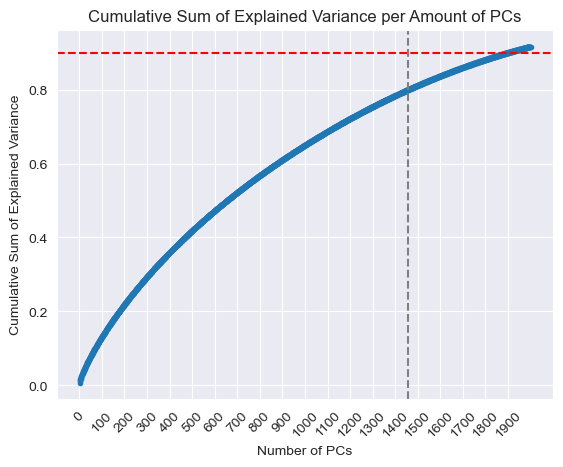

In [123]:
# plot graph of cumulative sum
plt.figure()
plt.plot(range(1,2001), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.axvline(1459, c='gray', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.title('Cumulative Sum of Explained Variance per Amount of PCs')
plt.xticks(range(0,2000, 100), rotation=45)
plt.show()

After some analysis, we have determined that in order to explain about 80% of the variance of the training data, we will have to use 1459 principal components.

In [124]:
# recreate PCA object with 2 components and transform independent variables
pca = PCA(n_components=1459).fit(X)
X_scaled_pca = pca.transform(X_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [254]:
# fitting logistic regression model
logreg = LogisticRegression(solver='lbfgs', C=1e-4, penalty='l2')
logreg.fit(X_scaled_pca, y)

# print evaluation metrics
print(f'Train Score: {logreg.score(X_scaled_pca, y).round(2)}')
print(f'Test Score: {logreg.score(X_test_scaled_pca, y_test).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, logreg.predict(X_test_scaled_pca))}')
print(classification_report(y_test, logreg.predict(X_test_scaled_pca)))

Train Score: 0.79
Test Score: 0.78
Confusion Matrix: 
 [[1140  669]
 [ 249 2209]]
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      1809
           1       0.77      0.90      0.83      2458

    accuracy                           0.78      4267
   macro avg       0.79      0.76      0.77      4267
weighted avg       0.79      0.78      0.78      4267



After PCA feature reduction, we have reduced the dimentionality of our data to 1459 features. This has a pretty large effect on decreasing computational power while also maintaining the overall performance of our model.

Using PCA as a dimension reduction tool has its upsides and downsides. An advantage of reducing our features is the reduction in runtime and computational power. Just like in our model above, we were able to cover 80% of the variance of our dataset, with only 1459 features, compared to the original 2744 columns. However, a downside would be in the realm of interpretability. Since principal components are simply vectors that explain variance of the data, the components themselves are not very straightforward and have no direct meaning in terms of features. We also experience slight information loss since only taking a limited number of PCs will not cover 100% of the variance of the population. Here, we see the train accuracy go down and the test accuracy actually go up. This increase in test accuracy may just be a one-off since its new data that the model has not seen before and so a one percent increase in accuracy does not necessarily mean an improved model.


## K-Nearest Neighbours

After fitting our Logistic Regression, we will now fit our data to a KNN model. To start, We will fit our train set to the default K Nearest Neighbors model, setting the k-value to be the default value of 5

In [263]:
from sklearn.neighbors import KNeighborsClassifier

# initialize and fit knn
knn = KNeighborsClassifier()
knn.fit(X_scaled_pca, y) # taken from the scaled and dimension reduced data from above

# print evaluation metrics
print(f'Train Score: {knn.score(X_scaled_pca, y)}')
print(f'Test Score: {knn.score(X_test_scaled_pca, y_test)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, knn.predict(X_test_scaled_pca))}')
print(classification_report(y_test, knn.predict(X_test_scaled_pca)))

Train Score: 0.746601031411158
Test Score: 0.6346379189125849
Confusion Matrix: 
 [[ 606 1203]
 [ 356 2102]]
              precision    recall  f1-score   support

           0       0.63      0.33      0.44      1809
           1       0.64      0.86      0.73      2458

    accuracy                           0.63      4267
   macro avg       0.63      0.60      0.58      4267
weighted avg       0.63      0.63      0.61      4267



After running our data through this base KNN model, we see that the accuracy score on the training set is 75% while the accuracy score on the test set is 64%. There is an 11% disparity between the train and the test set, seen with overfitting. We will address this later on in the notebook by selecting an optimized k-value. 

We also see a poor recall and f1-score on our bad rating class. This means that the model is unable to pick up on many bad ratings, classifying them as good ratings. We will try to target this metric when tuning hyper parameters since it seems to show poor performance compared to others.

Before we tune our k-value, we will reduce our data since KNNs are very computationally expensive. KNN complexity is directly proportionate to the amount of observations since the KNN will calculate the distance between the selected point and every other point in the dataset. This means that distance between every observation will have to be calculated, thus greatly increasing runtime. We will split our observations in half for both our train and test sets

In [256]:
# separating out 50% of our train data for knn
reviews_reduced_train = reviews.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))\
.reset_index().drop('index', axis=1)

# separating out 50% of our test data for knn
reviews_reduced_test = reviews_test.groupby('rating', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))\
.reset_index().drop('index', axis=1)

# splitting train data to X and y
X_train_reduced = reviews_reduced_train.drop('rating', axis=1)
y_train_reduced = reviews_reduced_train['rating']

# splitting test data to X and y
X_test_reduced = reviews_reduced_test.drop('rating', axis=1)
y_test_reduced = reviews_reduced_test['rating']

We have now reduced our number of observations for both train and test set by 50%. This reduced number of observations will decrease the number of distances that have to be calculated between each data point, thus decrease the run-time of every knn model

One advantage for reducing the number of observations would be the decreased runtime of a KNN. This is very useful for when we have computational limitations, especially when running models only from our laptops. Most laptops will not be able to run very computationally expensive models.

One disadvantage would be the loss of information. Reducing the number of observations also reduces the overall information from the original dataset. The model may be missing out on important patterns or relationships between features.

Now that we have reduced our observations, we will loop through many different K-values and find an optimal K-value for our KNN model. To do this, we will separate our train set to a train and validation set. We will then evaluate using the train and validation accuracies, as well as the bad reviews recall of the validation set. This is because we saw poor performance from it in our initial KNN model and we want a balance of being able to detect both good and bad ratings, instead of a one-sided model.

In [257]:
# train-validation split
X_train_reduced_split, X_validate_reduced_split, y_train_reduced_split, y_validate_reduced_split = train_test_split(X_train_reduced, y_train_reduced, test_size=0.2, random_state=0, stratify=y_train_reduced)

# scale data
scaler = StandardScaler()
scaler.fit(X_train_reduced_split)
X_train_reduced_split_scaled = scaler.transform(X_train_reduced_split)
X_validate_reduced_split_scaled = scaler.transform(X_validate_reduced_split)

# PCA feature reduction
pca = PCA(n_components=1459).fit(X_train_reduced_split_scaled)
X_train_reduced_split_scaled_pca = pca.transform(X_train_reduced_split_scaled)
X_validate_reduced_split_scaled_pca = pca.transform(X_validate_reduced_split_scaled)

# import KNN
from sklearn.neighbors import KNeighborsClassifier

# create knn table to store scores
knn_table = pd.DataFrame()

# loop over multiple k-values
for n,i in enumerate(range(1,100)):
    print(f'running through k-value = {i}', end="\r")

    # initializing knn and get classification report for metrics
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_reduced_split_scaled_pca, y_train_reduced_split)
    class_report = classification_report(y_validate_reduced_split, knn.predict(X_validate_reduced_split_scaled_pca), output_dict=True)

    # appending several metrics to our knn table
    knn_table.loc[n,'k-value'] = i
    knn_table.loc[n,'Train Accuracy'] = knn.score(X_train_reduced_split_scaled_pca, y_train_reduced_split)
    knn_table.loc[n,'Validate Accuracy'] = knn.score(X_validate_reduced_split_scaled_pca, y_validate_reduced_split)
    knn_table.loc[n,'Bad Rating Recall'] = class_report['0']['recall']
    knn_table.loc[n,'Bad Rating f1'] = class_report['0']['f1-score']
    knn_table.loc[n,'Good Rating Recall'] = class_report['1']['recall']
    knn_table.loc[n,'Good Rating f1'] = class_report['1']['f1-score']
    

knn_table.head()

,k-value,Train Accuracy,Validate Accuracy,Bad Rating Recall,Bad Rating f1,Good Rating Recall,Good Rating f1
0,1.0,1.000000,0.621875,0.449355,0.502058,0.748982,0.695214
1,2.0,0.841735,0.605469,0.668508,0.589764,0.559023,0.620015
2,3.0,0.800508,0.635156,0.418048,0.492942,0.795115,0.715070
3,4.0,0.781751,0.641406,0.613260,0.592000,0.662144,0.680139
4,5.0,0.760453,0.657813,0.478821,0.542797,0.789688,0.726592


Text(0.5, 1.0, 'Model Accuracy across different K-values')

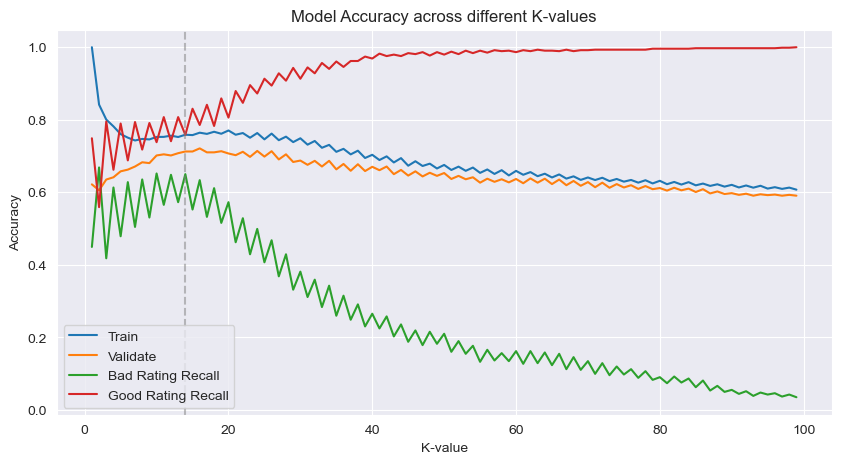

In [259]:
plt.figure(figsize=(10,5))
plt.plot(knn_table['k-value'], knn_table['Train Accuracy'], label='Train')
plt.plot(knn_table['k-value'], knn_table['Validate Accuracy'], label='Validate')
plt.plot(knn_table['k-value'], knn_table['Bad Rating Recall'], label='Bad Rating Recall')
plt.plot(knn_table['k-value'], knn_table['Good Rating Recall'], label='Good Rating Recall')
plt.axvline(x=14, linestyle='--', alpha=0.5, c='gray')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across different K-values')


In [260]:
# checking differences in accuracies
knn_table[knn_table['k-value'] == 14]

,k-value,Train Accuracy,Validate Accuracy,Bad Rating Recall,Bad Rating f1,Good Rating Recall,Good Rating f1
13,14.0,0.758695,0.7125,0.650092,0.657356,0.75848,0.752355


Through the loop above, we see that the best k-value for our data would be a k-value of 14. Although this does not fully deal with our problem of overfitting, It minimizes overfitting a little bit while also balancing out the recall and f1 ratings for both our target classes, which is very important to consider. We want a balance of being able to detect both good and bad ratings, instead of being very lopsided, detecting all as good, and having many false negatives. 

We will now see if this hyperparameter tuning will elicit a better performance on our test set.

In [262]:
# Initialize and fit KNN
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_scaled_pca, y) # taken from scaled data above

# print evaluation metrics
print(f'Train Score: {knn.score(X_scaled_pca, y)}')
print(f'Test Score: {knn.score(X_test_scaled_pca, y_test)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, knn.predict(X_test_scaled_pca))}')
print(classification_report(y_test, knn.predict(X_test_scaled_pca)))

Train Score: 0.7099546804188155
Test Score: 0.6515116006561987
Confusion Matrix: 
 [[ 546 1263]
 [ 224 2234]]
              precision    recall  f1-score   support

           0       0.71      0.30      0.42      1809
           1       0.64      0.91      0.75      2458

    accuracy                           0.65      4267
   macro avg       0.67      0.61      0.59      4267
weighted avg       0.67      0.65      0.61      4267



We see a slight change in regards to overfitting as the difference between the train and test scores are slightly smaller. However more importantly, we see both a lower f1-score and lower recall for our bad ratings class. We are misclassifying more false positives in relation to good reviews and are seeing less of a balance in our evaluation metrics between our good and bad ratings. This imbalance may also be due to the reduced dataset in our hyperparameter tuning, not being able to choose a K-value that is appropriate for our size of data. If we are able to train the model on more data as well as more balanced data, we may see a different performance out of the model. This is the model that we are left with, even after tuning our hyperparameters to a validation set. This just shows that just because a validation set has high metrics, it does not directly translate to the test set.

However, there was a small error in our process. Our clean data had already been vectorized, and therefore we split our data into train and validation after already vectorizing our data. This may lead to data leakage since we gave our model information about our test/validation data in the training/fitting phase. This is because when we vectorized the whole set, the vectorizer took information on the vocabulary and text from the test/validation values and incorporated it in the whole dataset. The features and values used in the training set may be influenced by the presence of different words in the test/validation set, which the model should not have seen before. In the future, we should make sure that we are vectorizing the training and validation sets independently, preventing this leakage.

## Decision Tree

Now that we have fit our data on both a logistic regression and a K-nearest neighbors model, we will fit a decision tree and see how the model differs to the other models in terms of performance, based on our data. To start, we will first fit all our given train set to a decision tree classifier with a max_depth of 1 as a baseline and test it on our test set.

In [132]:
# import decision trees
from sklearn.tree import DecisionTreeClassifier

In [133]:
# instantiate decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_scaled_pca, y) # taken from scaled data above

# print evaluation metrics
print(f'Train Score: {dt_model.score(X_scaled_pca, y).round(2)}')
print(f'Test Score: {dt_model.score(X_test_scaled_pca, y_test).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, dt_model.predict(X_test_scaled_pca))}')
print(classification_report(y_test, dt_model.predict(X_test_scaled_pca)))

Train Score: 1.0
Test Score: 0.67
Confusion Matrix: 
 [[1151  658]
 [ 735 1723]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1809
           1       0.72      0.70      0.71      2458

    accuracy                           0.67      4267
   macro avg       0.67      0.67      0.67      4267
weighted avg       0.68      0.67      0.67      4267



Oh no! Our model is definitely overfit and we need to deal with this. We will now look at improving our model using a validation set and finding the optimal max_depth for our data. As a good rule of thumb, we will loop from 1 through the square root of the number of our features to get our max_depth value. We will use our reduced observations training set that we reduced before doing the KNN model.

In [264]:
# train-validation split
X_train_reduced_split, X_validate_reduced_split, y_train_reduced_split, y_validate_reduced_split = train_test_split(X_train_reduced, y_train_reduced, test_size=0.2, random_state=0, stratify=y_train_reduced)

# scale data
scaler = StandardScaler()
scaler.fit(X_train_reduced_split)
X_train_reduced_split_scaled = scaler.transform(X_train_reduced_split)
X_validate_reduced_split_scaled = scaler.transform(X_validate_reduced_split)

# PCA feature reduction
pca = PCA(n_components=1459).fit(X_train_reduced_split_scaled)
X_train_reduced_split_scaled_pca = pca.transform(X_train_reduced_split_scaled)
X_validate_reduced_split_scaled_pca = pca.transform(X_validate_reduced_split_scaled)


# create knn table to store scores
dt_table = pd.DataFrame()

# loop over multiple k-values
for n,i in enumerate(range(1,int(math.sqrt(len(X.columns))))):
    print(f'running through max_depth = {i}', end="\r")

    # initializing knn and get classification report for metrics
    dt_model = DecisionTreeClassifier(max_depth=i).fit(X_train_reduced_split_scaled_pca, y_train_reduced_split)
    class_report = classification_report(y_validate_reduced_split, dt_model.predict(X_validate_reduced_split_scaled_pca), output_dict=True)

    # appending several metrics to our knn table
    dt_table.loc[n,'max_depth'] = i
    dt_table.loc[n,'Train Accuracy'] = dt_model.score(X_train_reduced_split_scaled_pca, y_train_reduced_split)
    dt_table.loc[n,'Validate Accuracy'] = dt_model.score(X_validate_reduced_split_scaled_pca, y_validate_reduced_split)
    dt_table.loc[n,'Bad Rating Recall'] = class_report['0']['recall']
    dt_table.loc[n,'Bad Rating f1'] = class_report['0']['f1-score']
    dt_table.loc[n,'Good Rating Recall'] = class_report['1']['recall']
    dt_table.loc[n,'Good Rating f1'] = class_report['1']['f1-score']
    

Text(0.5, 1.0, 'Model Accuracy across different max_depths')

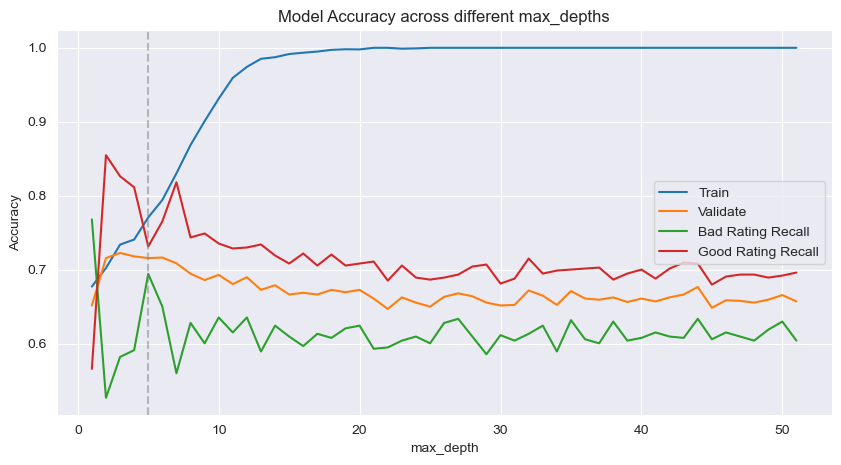

In [266]:
# plot the train/validate accuracies as well as the good and bad recalls across many max_depths
plt.figure(figsize=(10,5))
plt.plot(dt_table['max_depth'], dt_table['Train Accuracy'], label='Train')
plt.plot(dt_table['max_depth'], dt_table['Validate Accuracy'], label='Validate')
plt.plot(dt_table['max_depth'], dt_table['Bad Rating Recall'], label='Bad Rating Recall')
plt.plot(dt_table['max_depth'], dt_table['Good Rating Recall'], label='Good Rating Recall')
plt.axvline(x=5, linestyle='--', alpha=0.5, c='gray')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across different max_depths')


In [267]:
dt_table[dt_table['max_depth'] == 5]

,max_depth,Train Accuracy,Validate Accuracy,Bad Rating Recall,Bad Rating f1,Good Rating Recall,Good Rating f1
4,5.0,0.770614,0.715625,0.694291,0.674419,0.731343,0.747573


With a max_depth of 5, we see that our decision tree has not yet overfit and our validation accuracy is relatively high. We also see that this max depth also gives the most balanced recall for both good and bad ratings, implying that the model is able to detect a balance of both good and bad ratings. 

For this reason, our final decision tree will have a max_depth of 5 and we will now train it on our whole train set and evaluate on the given test set.

In [268]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_scaled_pca, y)

# print evaluation metrics
print(f'Train Score: {dt_model.score(X_scaled_pca, y).round(2)}')
print(f'Test Score: {dt_model.score(X_test_scaled_pca, y_test).round(2)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, dt_model.predict(X_test_scaled_pca))}')
print(classification_report(y_test, dt_model.predict(X_test_scaled_pca)))

Train Score: 0.75
Test Score: 0.74
Confusion Matrix: 
 [[1156  653]
 [ 453 2005]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1809
           1       0.75      0.82      0.78      2458

    accuracy                           0.74      4267
   macro avg       0.74      0.73      0.73      4267
weighted avg       0.74      0.74      0.74      4267



Setting the max_depth to a value of 5 removes the overfitting of our model and allows it to generalize better. It also increases the overall performance of the model up to 74%. However, even through our effort, we are unable to fully fix the imbalance of the recall and f1-score for both our target classes. With this model, we see a much higher performance when detecting good reviews than when detecting bad reviews even when we tried to balance this out. 

Decision trees and KNNs are two very different models with very different processes. Decision trees have some advantages over KNNs but also have some shortcomings:

**Advantages**
1. Decision trees are much more interpretable since the tree structure is easy to interpret and visualize, as well as shows which features are important in decision making. There are clear thresholds and reasoning behind each prediction while KNNs are simply just comparing distances.
2. Because of the nature of decision trees, it will exclude irrelevant features that may not have any impact on our predictions while KNNs would take into account every feature, even though it may not be as important for the feature as a whole. This is especially important since our data has a large amount of features.

**Disadvantages**
1. Decision trees have a high tendency to overfit. This is especially true when the tree is very deep and complex, with many max_depths, leading to very bad generalization. They also are altered drastically by slight changes in the training set. This sudden change due to small changes in data will make for a different model everytime.
2. Decision trees also have a very hard time predicting continuous data since the trees are made for categorical. The tree needs to make many many splits and leads to an overfit model that does not generalize well with regression problems.

In the past two models, we used a validation set. A validation set allows us to tune and optimize our models without exposing our models to the test set and tuning based on the outcome of the test set. This ensures no data leakage as the test set would be fully "new data" that the model and optimization process has not yet seen. The validation set increases our confidence that our model will do well against the general population and data that it has never seen before, ensuring us that our model will perform well in real-world scenarios where there is new data. It is also important to be sure that the validation set has similar target proportions to that of the whole train set to accurately assess and evaluate our models.

# Logistic Regression with cross validation

Now, we will re-run our logistic regression model and evaluate with cross-validation techniques to optimize model and tune our hyperparameter C-value. For this, we will be using a pipeline to avoid data leakage.

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# get range of c-values to iterate over (each value goes up by a factor of 10^X)
c_range = [10 ** exp for exp in range(-5, 5 + 1, 1)]

# create scores dataframe
logreg_scores = pd.DataFrame()

# loop through different C-values
for n,c in enumerate(c_range):
    print(f'running through c-value = {c}', end="\r")
    my_pipeline = Pipeline([('ss', StandardScaler()),
                            ('PCA', PCA(n_components=1459)), 
                            ('logreg', LogisticRegression(C=c, penalty='l2', solver='lbfgs'))])
    logreg_scores.loc[n,'C-value'] = c
    logreg_scores.loc[n,'Avg Cross-Val Score'] = cross_val_score(my_pipeline, X, y, cv=5).mean()
    

In [180]:
logreg_scores

,C-value,Avg Cross-Val Score
0,0.00001,0.644476
1,0.00010,0.768401
2,0.00100,0.777309
3,0.01000,0.766057
4,0.10000,0.763948
5,1.00000,0.760118
6,10.00000,0.763557
7,100.00000,0.761603
8,1000.00000,0.759416
9,10000.00000,0.758868


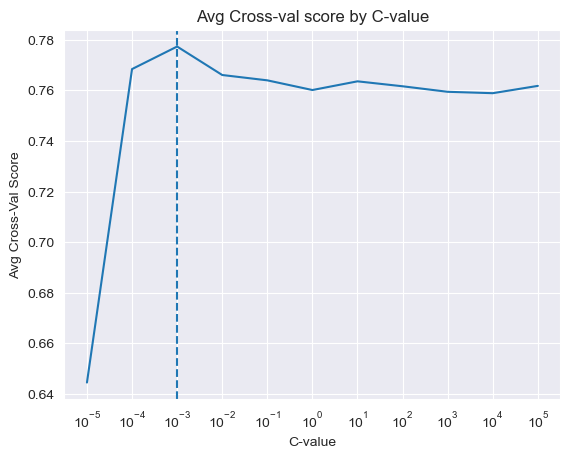

In [181]:
# plotting the c-values and cross-val scores
plt.figure()
sns.lineplot(x='C-value', y='Avg Cross-Val Score', data=logreg_scores)
plt.xscale('log')
plt.title('Avg Cross-val score by C-value')
plt.axvline(x=10e-4, linestyle='--')
plt.xticks(c_range)
plt.show()

From our cross-validation scores, we see that a c-value of 1e-3 gives us the best performance. This is different from above, where we picked a c-value of 1e-4. However, if you look at both graphs, you can see that a c-value of 1e-3 and 1e-4 are very similar in performance and thus we can pick either one and be happy.

Another way to achieve this is a grid search. For learning sake, we will do a grid search to find the best c-value for our Logistic Regression. The grid search also uses cross validation and finds the best performing model out of all the hyperparameters.

In [183]:
from sklearn.model_selection import GridSearchCV

# creating placeholder
estimators = [

    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=1459)), 
    ('model', LogisticRegression())

]

pipe = Pipeline(estimators)

grid_parameters = [
    {
        'scaler': [StandardScaler(), None],
        'dim_reducer': [PCA(n_components=1459)],
        'model': [LogisticRegression(solver='lbfgs')], 
        'model__C': c_range,
    }
]

grid = GridSearchCV(pipe, grid_parameters, cv=5)
fittedgrid = grid.fit(X,y)



In [184]:
fittedgrid.best_params_

{'dim_reducer': PCA(n_components=1459),
 'model': LogisticRegression(C=0.001),
 'model__C': 0.001,
 'scaler': StandardScaler()}

After fitting on to a grid search, our model found that the best c-value to get the best cross-validation score is a c-value of 1e-3. This verifies our hyperparameter tuning with cross-validation since we have found it two different times, two different ways.

We will now use this hyperparameter of 1e-3 on the test set and see it's performance on data it has never seen.

In [188]:
# create pipeline for logreg C=0.001
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=1459)),
    ('model', LogisticRegression(C=10e-3, penalty='l2', solver='lbfgs'))
])

pipeline.fit(X,y)
pipeline.score(X_test,y_test)


0.7773611436606516

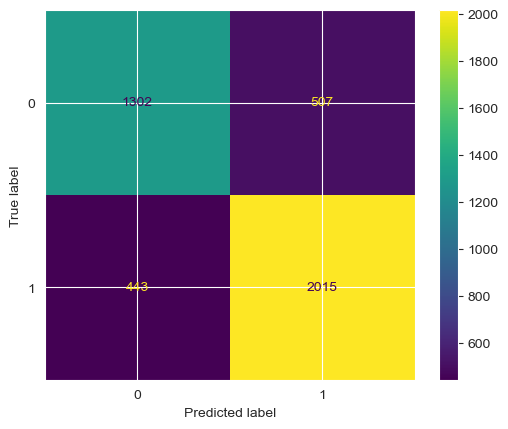

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay

# getting the confusion matrix then plotting it
cm = confusion_matrix(y_test,pipeline.predict(X_test))
ConfusionMatrixDisplay(cm).plot()
plt.show()


With the above confusion matrix, we can see that our model is not perfect. It is predicting about 507 reviews to be good even when they are bad and about 443 reviews to be bad, even when they are good. However, we can also see that our model does detect 2015 true good ratings and 1302 true bad ratings. This shows decent performance and tells us that our model is working. We are sure that our cross-validation accuracy is not only due to chance or an imbalanced dataset.

## Feature Engineering to create one new feature

To end off, we will engineer one new feature and rerun the model from above. We will re-optimize our c-value afterwards. We will first take a look at our data and see which features we can engineer

In [202]:
# setting view to display all columns
pd.set_option('display.max_columns', None)

# taking a look at the features
display(reviews.head())


Additional_Number_of_Scoring  Average_Score   
0                           620            9.0  \
1                          1258            9.4   
2                           995            8.1   
3                           853            8.4   
4                          1243            8.1   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews   
0                                  0                     1974  \
1                                  6                     4204   
2                                  2                     3826   
3                                  7                     2726   
4                                 11                     6608   

   Review_Total_Positive_Word_Counts   
0                                164  \
1                                  4   
2                                 38   
3                                 10   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat   
0                                           1                562  51.506558  \
1                                           5                276  51.502435   
2                                           1                129  51.504348   
3                                          10                164  51.507377   
4                                          69                639  51.513556   

        lng  weekday_of_review  month_of_review  year_of_review  bed_single   
0 -0.004514                  1                1            2016           0  \
1 -0.000250                  0               10            2016           0   
2 -0.033444                  0                3            2017           0   
3  0.038657                  0                2            2017           0   
4 -0.180002                  1               11            2015           0   

   bed_double  bed_queen  bed_king  trip_leisure  trip_biz  group_solo   
0           0          0         0             1         0           0  \
1           0          0         0             1         0           0   
2           0          0         0             1         0           0   
3           0          0         0             1         0           0   
4           0          0         0             0         1           0   

   group_couple  group_family  Hotel_Name_11 Cadogan Gardens  Hotel_Name_41   
0             1             0                              0              0  \
1             0             0                              0              0   
2             1             0                              0              0   
3             1             0                              0              0   
4             0             0                              0              0   

   Hotel_Name_88 Studios  Hotel_Name_Ace Hotel London Shoreditch   
0                      0                                       0  \
1                      0                                       0   
2                      0                                       0   
3                      0                                       0   
4                      0                                       0   

   Hotel_Name_Adria Boutique Hotel  Hotel_Name_Aloft London Excel   
0                                0                              0  \
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Hotel_Name_Amba Hotel Charing Cross  Hotel_Name_Amba Hotel Marble Arch   
0                                    0                                  0  \
1                                    0                                  0   
2                                    0                                  0   
3                                    0                              

We can see that we are given information on the total word count of both positive and negative reviews (Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts). We can use this information to see whether the negative words or positive words are larger. This would give us insight on if reviewers had more positive or negative words to say. Since 1 represents a good review and 0 represents a bad review in our target column, we can create a new binary column called "higher_pos" that reports 1 if the positive word count is greater than the negative word count and 0 otherwise.

In [225]:
# creating a new columnn in train set that shows whether a review has a higher positive word count than negative word count
reviews['higher_pos'] = np.where((reviews['Review_Total_Positive_Word_Counts'] - reviews['Review_Total_Negative_Word_Counts']) > 0, 1, 0)

# sanity check to see distribution
reviews.higher_pos.value_counts(normalize=True)*100

higher_pos
1    50.156274
0    49.843726
Name: proportion, dtype: float64

In [224]:
# creating a new columnn in test set that shows whether a review has a higher positive word count than negative word count
reviews_test['higher_pos'] = np.where((reviews_test['Review_Total_Positive_Word_Counts'] - reviews_test['Review_Total_Negative_Word_Counts']) > 0, 1, 0)

# sanity check to see distribution
reviews_test.higher_pos.value_counts(normalize=True)*100

higher_pos
0    50.902273
1    49.097727
Name: proportion, dtype: float64

We have now created our new column for both the given train and test sets. We see that the distribution of our new feature in both the train and test sets are very similar. This is good because we are able to see consistency in our feature engineering.

Now, we will go ahead and split our data to our independent and dependent variables in preparation to re-run our logistic regression model.

In [228]:
# creating our new training independent and dependent variables
X_new = reviews.drop('rating', axis=1)
y_new = reviews['rating']

# creating our new test independent and dependent variables.
X_test_new = reviews_test.drop('rating', axis=1)
y_test_new = reviews_test['rating']

In [238]:
from scipy import stats

# checking the pearson correlation of our new feature to the target variable
pearson_corr, pvalue = stats.pearsonr(X_new['higher_pos'], y_new)

print(f'Pearson Correlation: {pearson_corr.round(2)} \np-value: {pvalue}')


Pearson Correlation: 0.45 
p-value: 0.0


We have now split our new independent and dependent variables for our train and test sets. We also took a look at the correlation of our new feature to the target column. We see that it has a decently high correlation of 0.45 with a p-value of zero. This is important because we now know that the new feature is statistically correlated with our target column and should help in making predictions of the target classes.

We will now fit our same model to this data.

In [239]:
# get range of c-values to iterate over (each value goes up by a factor of 10^X)
c_range = [10 ** exp for exp in range(-5, 5 + 1, 1)]

# create scores dataframe
logreg_scores = pd.DataFrame()

# loop through different C-values
for n,c in enumerate(c_range):
    print(f'running through c-value = {c}', end="\r")
    my_pipeline = Pipeline([('ss', StandardScaler()),
                            ('PCA', PCA(n_components=1459)), 
                            ('logreg', LogisticRegression(C=c, penalty='l2', solver='lbfgs'))])
    logreg_scores.loc[n,'C-value'] = c
    logreg_scores.loc[n,'Avg Cross-Val Score'] = cross_val_score(my_pipeline, X_new, y_new, cv=5).mean()

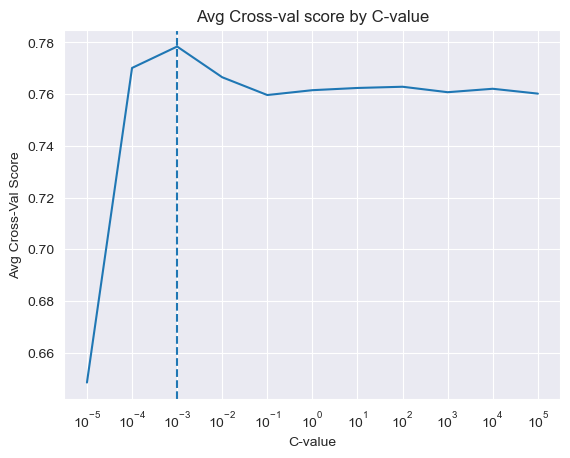

In [241]:
# create a figure of c-values and cross validation scores
plt.figure()
sns.lineplot(x='C-value', y='Avg Cross-Val Score', data=logreg_scores)
plt.xscale('log')
plt.title('Avg Cross-val score by C-value')
plt.axvline(x=10e-4, linestyle='--')
plt.xticks(c_range)
plt.show()

After adding the new feature to our data and re-optimizing the strength of our regularization, we can see that the best c-value is still 1e-3, as evaluated with cross-validation. We will now test this model on our test set and asses the performance of the model.

In [242]:
# create pipeline for logreg C=0.001
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=1459)),
    ('model', LogisticRegression(C=10e-3, penalty='l2', solver='lbfgs'))
])

pipeline.fit(X_new,y_new)
pipeline.score(X_test_new,y_test_new)

0.7782985704241856

The accuracy of our model stayed fairly similar, increasing by about 0.1%, which is almost negligible. However, this is just the accuracy, we will now also take a look at the confusion matrix

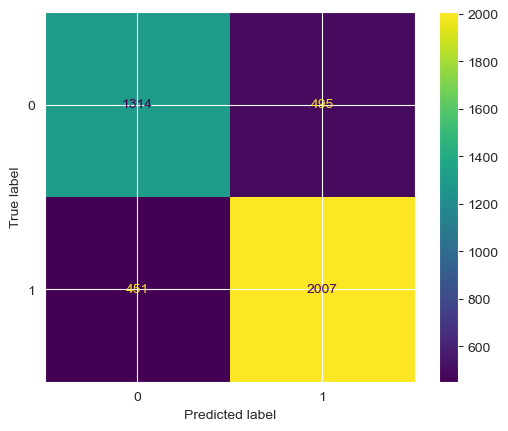

In [243]:
# getting the confusion matrix then plotting it
cm = confusion_matrix(y_test_new,pipeline.predict(X_test_new))
ConfusionMatrixDisplay(cm).plot()
plt.show()

Here, we see that the confusion matrix is very similar, with or without the new engineered feature. Since we have so many features in our model, adding one more feature likely would not make too big of a difference. However, if we only had a few features, this new feature would likely have a much stronger impact on our model's predictions and performance. For example, If we ran a logistic regression with only a handful of features, and our new feature being one of them, it would likely perform better than without the new feature.

## Conclusion

We have now fit and optimized Logistic Regression, K-Nearest Neighbors, and Decision tree models to our hotel reviews dataset, taking samples of the data set to optimize both the KNN and Decision Trees. Of all the models, the Logistic Regression model seems to be performing the best. It is consistently scoring about a 77-79% accuracy accross train, validation, cross-validation, and test scores. Regularization needs to be applied to the Logistic regression for it to perform as well as it did. However, the KNN and Decision trees did not do too bad. They still showed 65% and 74% accuracy respectively, after tuning our hyperparameters of our model. 